In [1]:
import numpy as np
import utils

cifar10_dir = "./data/cifar-10-batches"
X_train, y_train, X_test, y_test = utils.load_cifar10(cifar10_dir)
print("训练数据形状", X_train.shape)
print("训练标签形状:", y_train.shape)
print("测试数据形状:", X_test.shape)
print("测试标签形状:", y_test.shape)

训练数据形状 (50000, 3072)
训练标签形状: (50000,)
测试数据形状: (10000, 3072)
测试标签形状: (10000,)


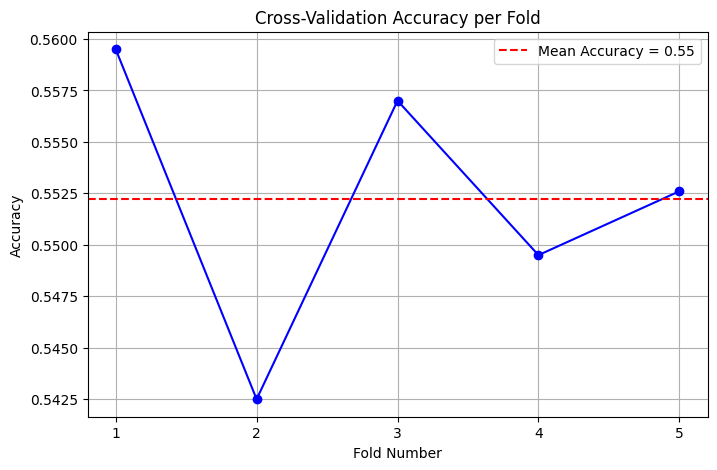

In [2]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def train_SVM(X_train, y_train):
    # PCA降维
    pca = PCA(n_components=96)
    X_train_reduced = pca.fit_transform(X_train)

    # 交叉验证拟合SVM
    svc = SVC(C=5, gamma='scale', kernel='rbf')
    scores = cross_val_score(svc, X_train_reduced, y_train, cv=5, scoring='accuracy')

    # 交叉验证正确率可视化
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b')
    plt.axhline(y=np.mean(scores), color='r', linestyle='--', label=f"Mean Accuracy = {np.mean(scores):.2f}")
    plt.title("Cross-Validation Accuracy per Fold")
    plt.xlabel("Fold Number")
    plt.ylabel("Accuracy")
    plt.xticks(range(1, len(scores) + 1))
    plt.legend()
    plt.grid(True)
    plt.show()

    # 在整个训练集拟合SVM
    svc.fit(X_train_reduced, y_train)

    return svc, pca

best_svm, pca = train_SVM(X_train, y_train)

In [3]:
def test_svm(X_test, y_test, best_svm, pca):
    # 测试
    X_test_reduced = pca.transform(X_test)
    y_pred = best_svm.predict(X_test_reduced)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"测试准确率: {accuracy * 100:.2f}%")
    return y_pred

y_pred = test_svm(X_test, y_test, best_svm, pca)

测试准确率: 56.41%


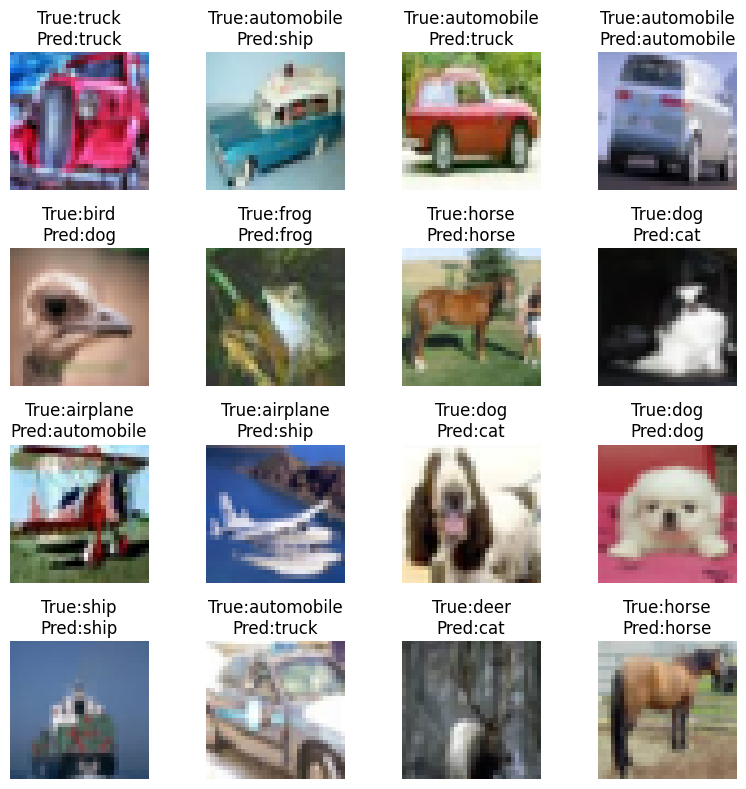

In [4]:
utils.show_predict_res(X_test, y_test, y_pred)

分类报告:
              precision    recall  f1-score   support

           0       0.63      0.66      0.65      1000
           1       0.65      0.68      0.67      1000
           2       0.45      0.45      0.45      1000
           3       0.38      0.38      0.38      1000
           4       0.49      0.49      0.49      1000
           5       0.50      0.46      0.48      1000
           6       0.58      0.64      0.61      1000
           7       0.65      0.59      0.62      1000
           8       0.67      0.69      0.68      1000
           9       0.62      0.59      0.61      1000

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.56     10000
weighted avg       0.56      0.56      0.56     10000



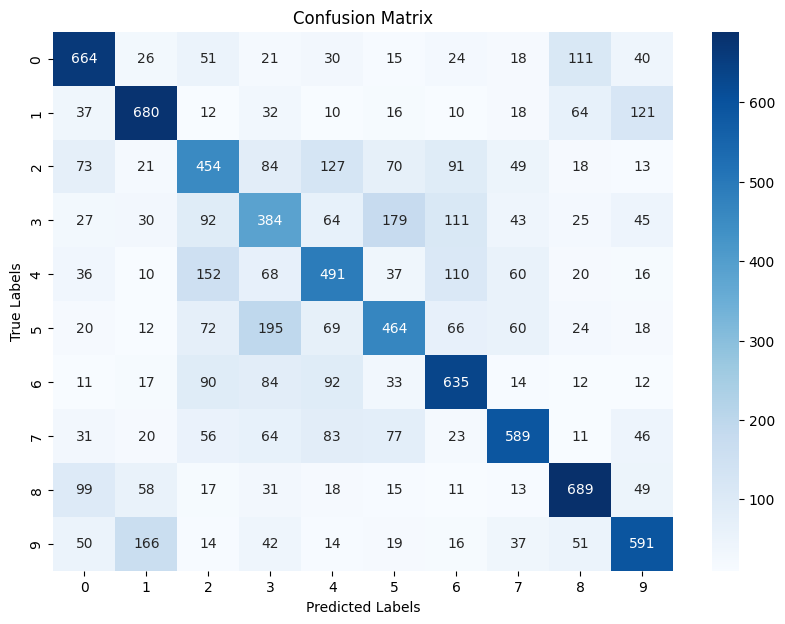

In [5]:
utils.get_report_and_cm(y_test, y_pred)